In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ex1data1.txt', sep=',', header = None, names = ['input', 'target'])

In [3]:
df.head()

,input,target
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   97 non-null     float64
 1   target  97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


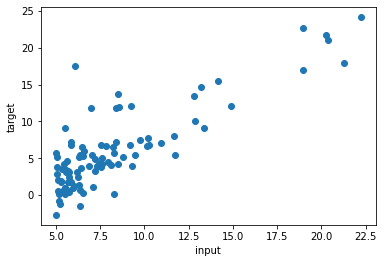

In [5]:
plt.scatter(df.input, df.target)
plt.xlabel('input')
plt.ylabel('target')
plt.show()

In [6]:
x = np.array(df.input.tolist())
y = np.array(df.target.tolist())

<AxesSubplot:>

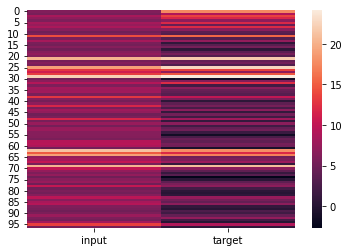

In [12]:
sns.heatmap(df)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

In [14]:
len(train_x), len(test_x)

(77, 20)

In [15]:
m = y.size
m

97

In [16]:
x = np.stack([np.ones(m), x], axis=1)

In [24]:
def compute_cost_function(x, y, theta):
    J = 0
    hypothesis = x.dot(theta)
    J = 1 / (2*m) * np.sum(np.square(hypothesis - y))
    return J

In [25]:
theta = [[0], [0]]
J = compute_cost_function(x, y, theta)
print(f"The cost function (loss) obtained is {round(J, 4)}")

The cost function (loss) obtained is 3111.0552


In [7]:
def gradient_descent(x, y, eta, epochs):
    n = len(x)
    a, c = (0, 0)

    for i in range(epochs):
        y_pred = a * x + c
        derivative_wrt_a = (-1/n) * np.sum(x * (y - y_pred))
        derivative_wrt_c = (-1/n) * np.sum(y - y_pred)
        a = a - eta * derivative_wrt_a
        c = c - eta * derivative_wrt_c
    
    return a, c

In [13]:
eta = 0.001
epochs = 100

a, c = gradient_descent(x, y, eta, epochs)

print(f'After gradient descent for {epochs} epochs')
print(f'slope obtained is {round(a, 4)} and intercept obtatined is {round(c, 4)}')

After gradient descent for 100 epochs
slope obtained is 0.8006 and intercept obtatined is 0.0087


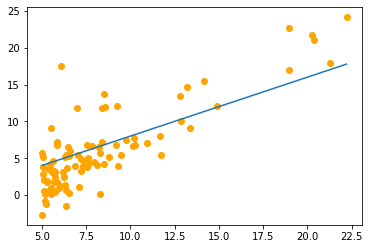

In [14]:
y_pred = a * x + c

plt.scatter(x, y, color = 'orange')
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)])
plt.show()